### Objective - problem statement
Credit scoring algorithm. The problems attempts to find the probability that someone will experience distress in two years.

Data Features | Description | Format
--------------|-------------|---
SeriousDlqin2yrs | Person experienced 90 days past due delinquency or worse 	| Y/N
RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits	| percentage
age |	Age of borrower in years	| integer
NumberOfTime30-59DaysPastDueNotWorse| Number of times borrower has been 30-59 days past due but no worse in the last 2 years. |	integer
DebtRatio | Monthly debt payments, alimony,living costs divided by monthy gross income	| percentage
MonthlyIncome |	Monthly income	| real
NumberOfOpenCreditLinesAndLoans | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) |	integer
NumberOfTimes90DaysLate |	Number of times borrower has been 90 days or more past due.	| integer
NumberRealEstateLoansOrLines |	Number of mortgage and real estate loans including home equity lines of credit	| integer
NumberOfTime60-89DaysPastDueNotWorse |	Number of times borrower has been 60-89 days past due but no worse in the last 2 years. |	integer
NumberOfDependents |	Number of dependents in family excluding themselves (spouse, children etc.) |	integer


### Data Loading and Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cstrain=pd.read_csv("C:/Users/Vinod/Documents/Python Scripts/GiveMeSomeCredit/cs-training.csv")
cstrain = cstrain.drop('Unnamed: 0', 1)
cstrain.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
feat_cols= ['age','NumberOfTime30-59DaysPastDueNotWorse','RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

The **dimensions** of the dataset that we are working with: 150,000 rows with 10 features

In [3]:
train=cstrain.loc[:,feat_cols]
train.shape

(150000, 10)

In [4]:
y=cstrain.loc[:,['SeriousDlqin2yrs']].SeriousDlqin2yrs
y.shape

(150000,)

Quick summary of the dataset:

In [181]:
train.describe()

,age,NumberOfTime30-59DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,52.295207,0.421033,6.048438,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,14.771866,4.192781,249.755371,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.029867,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,0.000000,0.154181,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,63.000000,0.000000,0.559046,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,109.000000,98.000000,50708.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
y.value_counts()/len(y)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

We have an *unbalanced* dataset with 93% as 0 and 6% as 1.

A random coin toss has 50% accuracy. Without any prediction, the data can produce an accuracy of 93%.

Hence, Model accuracy is not a very good metric to refer to evaluate the performance. We need to look at other performance metrics such as the the ROC and AUC to evaluate the predicts and improve 


## Data Discovery & Cleaning

### Null value assessment 
As a first step in data analysis, it is necessary of find how clean the data is. Since all columns are numeric, and only two columns (monthly income and number of dependents) have null values.

In [10]:
train.apply(lambda x: sum(x.isnull()),axis=0)  ## for entire dataset

age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
RevolvingUtilizationOfUnsecuredLines        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

#### Number of dependents variable


In [17]:
train.NumberOfDependents.value_counts() ## hugely skewed representation, most having 0-2 dependents

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [15]:
sum(train.NumberOfDependents.isnull())/len(train.NumberOfDependents)
# 2% of the data have null value in dependents. This is a long tail distribution.
# It is a resonable assumption to think that 2% actually have no dependents. We treat the data in NullTreatment_Median function

0.026159999999999999

#### Monthly income variable

In [26]:
%matplotlib inline 
train.MonthlyIncome[train.MonthlyIncome.isnull()==False].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [22]:
sum(train.MonthlyIncome.isnull())/len(train.MonthlyIncome)

0.19820666666666667

20% of monthly income has null values.Since this a very wide distribution, Taking median income value for all null values is an option

#### Function for Null Treatment and setting null values
There are different methods for null treatment. Median, Mean are popular options. Since we have close to 20% values missing in income, it is impossible to ignore Null values. There are other methods like predicting monthly income using other factors. In this analysis, i've keep at **Median** based treatment

In [29]:
def NullTreatMent_Median(data):
    data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace=True)
    data['NumberOfDependents'].fillna(0.0,inplace=True)
    return data

### Data Discovery - Variable Analysis & Outlier Treatment

Since there are 10 different features available, it is important to analyse how each features vary and how they can potentially impact the target variable.

In [31]:
data=train
data['SeriousDlqin2yrs']=y
data.head()

,age,NumberOfTime30-59DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,45,2,0.766127,0.802982,9120.0,13,0,6,0,2.0,1
1,40,0,0.957151,0.121876,2600.0,4,0,0,0,1.0,0
2,38,1,0.658180,0.085113,3042.0,2,1,0,0,0.0,0
3,30,0,0.233810,0.036050,3300.0,5,0,0,0,0.0,0
4,49,1,0.907239,0.024926,63588.0,7,0,1,0,0.0,0


#### Feature 1: RevolvingUtilizationOfUnsecuredLines

In [32]:
data.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

(array([  1.49953000e+05,   3.10000000e+01,   9.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([     0. ,   5070.8,  10141.6,  15212.4,  20283.2,  25354. ,
         30424.8,  35495.6,  40566.4,  45637.2,  50708. ]),
 <a list of 10 Patch objects>)

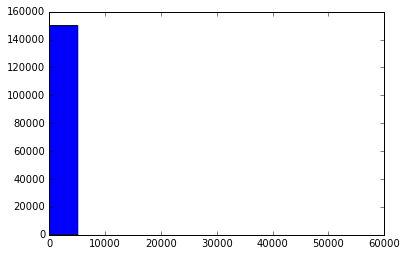

In [33]:
plt.hist(data.RevolvingUtilizationOfUnsecuredLines) ## heavily skewed factor

In [34]:
np.percentile(data.RevolvingUtilizationOfUnsecuredLines,99.5)

1.3662693040650089

**99.5 %** of data points in RevolvingUtilizationOfUnsecuredLines lie between 0-1.367.

It is better to cap to avoid any data skewness. Also data points > 1.5 are capped to 1.5

In [36]:
def Treat_RevolvingUtilizationOfUnsecuredLines(data):
    New = []
    for x in data.RevolvingUtilizationOfUnsecuredLines:
        if x > 1.5 :
            New.append(1.5)
        else:
            New.append(x)
    data.RevolvingUtilizationOfUnsecuredLines=New
    return data

data=Treat_RevolvingUtilizationOfUnsecuredLines(data)

##### Feature2: age

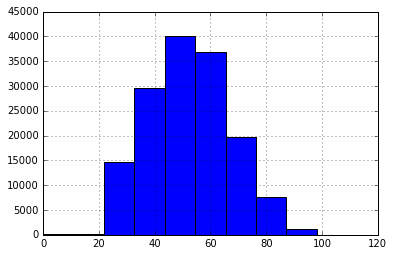

In [37]:
data.age.hist()

In [38]:
len(data.age[data.age.values < 20]) ,  len(data.age[data.age.values > 95]) ,np.percentile(data.age,99.9)
#only entry in <20 ; <0.1% data at 95+ years age ; 


(1, 63, 94.0)

In [39]:
def Treat_age(data):
    New=[]
    for x in data.age:
        if x < 20:
            New.append(20)
        elif x > 95:
            New.append(95)
        else:
            New.append(x)
    data.age=New
    return data

data=Treat_age(data)

#### Feature 3: NumberOfTime30-59DaysPastDueNotWorse

In [41]:
data['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [42]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts() ## few values > 8

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

We can check if the outlier entries impact the Credit crisis and make people go default

In [44]:
pd.crosstab(cstrain['NumberOfTime30-59DaysPastDueNotWorse'], cstrain.SeriousDlqin2yrs) 

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


No real pattern for NumberOfTime30-59DaysPastDueNotWorse vs target variable SeriousDlqin2yrs, therefore we can correct outlier values alone


In [45]:
def Treat_NumberOfTime3059DaysPastDueNotWorse(data):
    New=[]
    for x in data['NumberOfTime30-59DaysPastDueNotWorse']:
        if x in (98,96):
            New.append(0)
        else:
            New.append(x)
    data['NumberOfTime30-59DaysPastDueNotWorse']=New
    return data

data=Treat_NumberOfTime3059DaysPastDueNotWorse(data)

#### Feature 5 : Debt Ratio

In [46]:
data.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [47]:
len(data.DebtRatio[data.DebtRatio.values > 1])/len(data) ## 23% data have ratio > 1

0.23424666666666666

In [49]:
np.percentile(data.DebtRatio,5), np.percentile(data.DebtRatio,50),np.percentile(data.DebtRatio,80),np.percentile(data.DebtRatio,90)

(0.004329004, 0.366507841, 4.0, 1267.0)

Since last 20% of the data on debt ratio are erratic and have exponentially high values. Once of the methods that we can adopt is capping the debt ratio value. In this analysis, we cap the last 20% of data with a value of 80th% value

C:\Users\Vinod\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


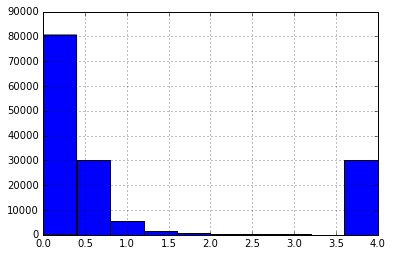

In [50]:
data.DebtRatio[data.DebtRatio.values > 4]=4 ## All beyond entries are grouped together
data.DebtRatio.hist()

##### feature 5: MonthlyIncome

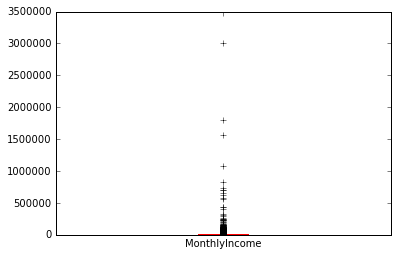

In [52]:
data['MonthlyIncome'].plot.box()
data=NullTreatMent_Median(data) ## As discussed, we are capping with median values for monthly income

##### Feature 6 -NumberOfOpenCreditLinesAndLoans 

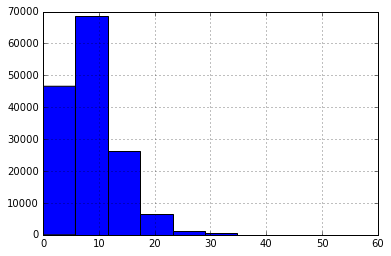

In [54]:
#This could offer some imp info about problem. Not transforming it
data.NumberOfOpenCreditLinesAndLoans.hist()

##### Feature 7 - NumberOfTimes90DaysLate

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

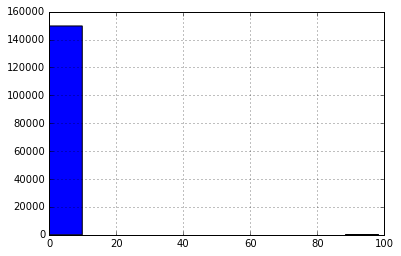

In [55]:
data.NumberOfTimes90DaysLate.hist()
data.NumberOfTimes90DaysLate.value_counts()
## Same problem as 'NumberOfTime30-59DaysPastDueNotWorse'

In [57]:
## just treating the outlier values
def Treat_NumberOfTimes90DaysLate(data):
    New=[]
    for x in data['NumberOfTimes90DaysLate']:
        if x in (98,96):
            New.append(0)
        else:
            New.append(x)
    data['NumberOfTimes90DaysLate']=New
    return data
data=Treat_NumberOfTimes90DaysLate(data)

##### Feature 8 -NumberRealEstateLoansOrLines

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

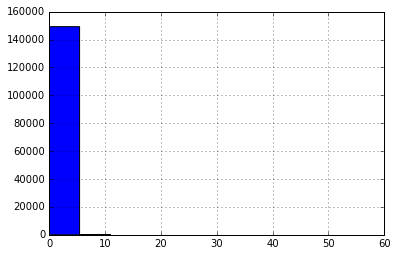

In [61]:
data.NumberRealEstateLoansOrLines.hist()
data.NumberRealEstateLoansOrLines.describe()
data.NumberRealEstateLoansOrLines.value_counts()


In [62]:
## capping all outlier values in the long tail with 10
def Treat_NumberRealEstateLoansOrLines(data):
    New = []
    for x in data.NumberRealEstateLoansOrLines:
        if x >= 10 :
            New.append(10)
        else:
            New.append(x)
    data.NumberRealEstateLoansOrLines=New
    return data
data=Treat_NumberRealEstateLoansOrLines(data)


##### Feat 9 - NumberOfTime60-89DaysPastDueNotWorse

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

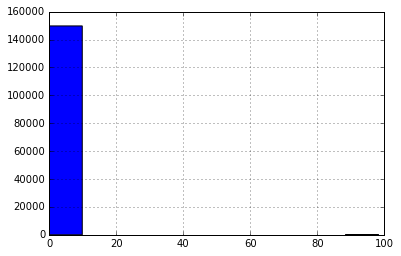

In [63]:
data['NumberOfTime60-89DaysPastDueNotWorse'].hist()
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

In [64]:
## Same problem as 'NumberOfTime30-59DaysPastDueNotWorse'
def Treat_NumberOfTime6089DaysPastDueNotWorse(data):
    New=[]
    for x in data['NumberOfTime60-89DaysPastDueNotWorse']:
        if x in (98,96):
            New.append(0)
        else:
            New.append(x)
    data['NumberOfTime60-89DaysPastDueNotWorse']=New
    return data
data=Treat_NumberOfTime6089DaysPastDueNotWorse(data)

##### Feature 10 - NumberOfDependents

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

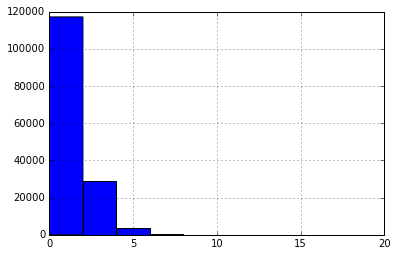

In [66]:
data.NumberOfDependents.hist()
data.NumberOfDependents.value_counts()

In [67]:
## Since long tail dist. we can group last few entries
def Treat_NumberOfDependents(data):
    New=[]
    for x in data['NumberOfDependents']:
        if x > 10.0:
            New.append(10.0)
        else:
            New.append(x)
    data['NumberOfDependents']=New
    return data
data=Treat_NumberOfDependents(data)

### 2-way analysis of variables

In two way analysis, we try to find any major trends of different variables with the target variable

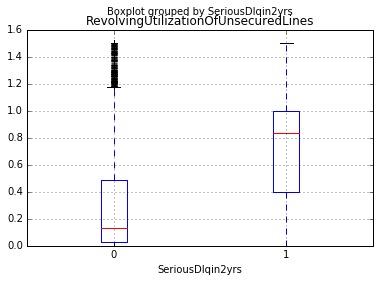

In [70]:
data.boxplot(column="RevolvingUtilizationOfUnsecuredLines",by="SeriousDlqin2yrs") ## those with higher values tend to default more

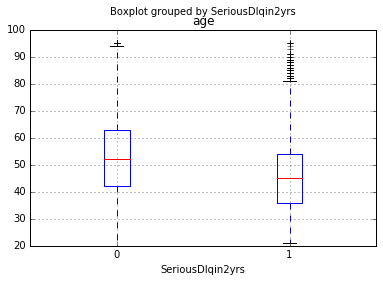

In [71]:
data.boxplot(column="age",by="SeriousDlqin2yrs") #marginal or no difference between those default and not defaulting.

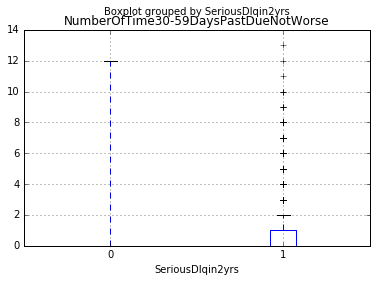

In [72]:
data.boxplot(column="NumberOfTime30-59DaysPastDueNotWorse",by="SeriousDlqin2yrs") ## Non defaulters have value 0 for 30-59 days perio

In [74]:
#data.boxplot(column="DebtRatio",by="SeriousDlqin2yrs") ## not useful
#data.boxplot(column="MonthlyIncome",by="SeriousDlqin2yrs") #  ## not useful
#data.boxplot(column="NumberOfTimes90DaysLate",by="SeriousDlqin2yrs") ## not useful

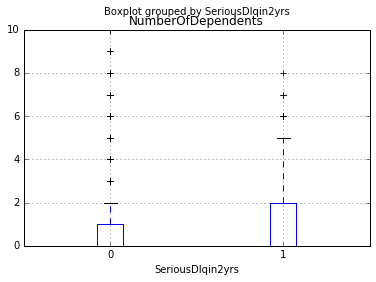

In [76]:
data.boxplot(column="NumberOfDependents",by="SeriousDlqin2yrs") ## higher the dependents, marginally higher chance of defaulting

In [77]:
## One potential hypothesis - AS the number dependents increases, monthly income decrases, leading to credit crises ;
## But again since number of entries are less for Defaulting customers, we might get lower income values
data.pivot_table(index='SeriousDlqin2yrs', values="MonthlyIncome", columns="NumberOfDependents",aggfunc=np.median)


NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
SeriousDlqin2yrs,,,,,,,,,,,
0,5400.0,5584.0,6000.0,6461.0,7000.0,7500.0,7365.0,8603.5,7750.0,5400.0,6316.0
1,5400.0,5000.0,5162.0,5355.0,5400.0,5650.0,5400.0,4361.0,3934.0,NaN,NaN


#### DATA TRANSFORMATION - NEW FEATURES REQUIRED


Two potential new features that can be added are Total debt and Income per dependent

**Total debt** is calculated from Debt ratio and Monthly income. 

**Income per Dependent** can potentially help in identifying the risk associated with dependents and income. 

Less income and more dependents should ideally double the chances of default.

In [82]:
data['TotalDebt']=data.DebtRatio * data.MonthlyIncome
#if data.TotalDebt <=1:
#    data['LogTotalDebt']= 0.0
#else:
#    data['LogTotalDebt']= np.log(data.TotalDebt)

In [125]:
#temp1 = data.loc[1:,['MonthlyIncome','NumberOfDependents']]
for i in range(0,150000):
    if data.loc[i,'NumberOfDependents']> 0:
        data.loc[i,'IncomePerDependent']=data.loc[i,'MonthlyIncome']/data.loc[i,'NumberOfDependents']
    else:
        data.loc[i,'IncomePerDependent']=data.loc[i,'MonthlyIncome']

data.head()
data.shape

(150000, 13)

In [84]:
data.dtypes

age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
RevolvingUtilizationOfUnsecuredLines    float64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
SeriousDlqin2yrs                          int64
TotalDebt                               float64
IncomePerDependent                      float64
dtype: object

In [85]:
## Not required now, as all variables are numeric
## from sklearn.preprocessing import LabelEncoder ##sklearn takes only numeric values
#var_mod = ['age','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
#le = LabelEncoder()
#for i in var_mod:
#    df[i] = le.fit_transform(df[i])
#df.dtypes

## MODEL PREDICTIONS

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Sampling of Data

Since we have used the entire training dataset for cleaning, it is important to build models and validate on different sets of data. Generally a validation set of data is used to test the model trained using a train data

Train data : Test data ~ 70 :30 

There are different sampling techniques available to split the data into training and test data

For simplicity reasons, we take 1:125000 as training and 125001:150000 as test data here

In [89]:
## Training data
xtrain=data.loc[1:125000,feat_cols]
xtrain.shape
ytrain=data.loc[1:125000,['SeriousDlqin2yrs']].SeriousDlqin2yrs
ytrain.shape

(125000,)

In [90]:
## Testing data (Validation set - OOB)
xtest=data.loc[125000:150000,feat_cols]
ytest=data.loc[125000:150000,['SeriousDlqin2yrs']].SeriousDlqin2yrs

Different models are tried here : 
1) Logistic 2) Random Forests 3) Gradient Boosting models.

In [91]:
lr_unbalanced=LogisticRegression()
lr_balanced=LogisticRegression(class_weight = "balanced")
rf_unbalanced=RandomForestClassifier()
rf_balanced=RandomForestClassifier(class_weight='balanced',oob_score=True)
gbm=GradientBoostingClassifier()

#### Need for performance evaluation parameters

Once we have created a machine learning classifier, it is important to determine how effective the model is in predicting whether a customer will default or not. A simple approach is to check how accuracy the model is. The difference between the predicted and actual value

Actual (row wise) vs Predicted (column wise ) | 1 | 0 |
- | - | - |
1 | a (True Positive) | b (False Negative) 
0 | c (False Positive)| d (True Negative)

The table above provides a representation of the confusion matrix. This table is generally used for binary classifiers. It provides an illustration of actual and predicted classes in the dataset

The most commonly used performance evaluation metric is Accuracy. It determines how accurate the model predicts with respect to the actual predictions.Accuracy is the ratio of (a+d)/(a+b+c+d). 

Given that we have a biased dataset with 93% data belonging to one class, any prediction algorithm needs to be better than  93% for it to be meaningful. Needless to say, the threshold for class 0 or class 1 will also be very different (greater than 50% and less than 50% rule doesnt apply). There is a need to look at other performance metrics such as precision, recall or true positive rate, false positive rate, ROC

**Precision** = a/(a+c)
**Recall (True positive rate TPR)** = a/(a+b)
**False positive rate FPR** = c/(c+d)

Any good model should try to maximize a and d and minimize entries in b and c. There's a cost associated with making inaccurate predictions and resulting in b and c.

c=> The customer actually doesnt default, but we have predicted as default. This is acceptable. No major problem
b=> The customer actually defaults and the model fails to predict the case. This is problematic more often than.

Most classification algorithms try to select threshold in a way to minimize the cost associated with making wrong prediction. They used True positive rate and false positive rate as means to identify the performance.

**ROC** - Receiver operating characteristic is obtained by plotting TPR and FPR. The ROC curves are insensitive to class distribution and used to evaluate the trade-off between TPR and FPR

**AUC** - Area under the curve . It is the area under the RoC curve. For a perfect classifier, AUC =1. 


***

We evaluate the accuracy, ROC and AUC scores for different models using training and test data.

In [106]:
Accuracy_list =[]
def acc_roc_plot(model,model_detail,xtrain,ytrain, xtest,ytest):
    model.fit(xtrain,ytrain)
    yhat=model.predict(xtest)
    acc = metrics.accuracy_score(yhat,ytest) ## Training error
    Accuracy_list.append({model_detail:acc}) ## Training error
    preds=model.predict_proba(xtest)[:,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, preds)
    roc_auc=metrics.auc(fpr,tpr)
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    plt.plot(fpr,tpr, label='%s %.3f' % (str(model_detail), roc_auc) , lw=2)


C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


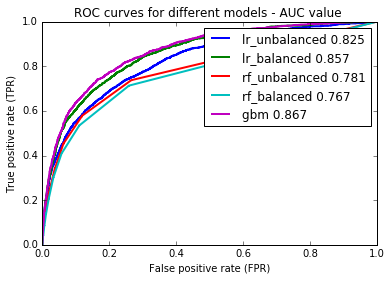

In [107]:
acc_roc_plot(lr_unbalanced,"lr_unbalanced",xtrain,ytrain,xtest,ytest)
acc_roc_plot(lr_balanced,"lr_balanced",xtrain,ytrain,xtest,ytest)
acc_roc_plot(rf_unbalanced,"rf_unbalanced",xtrain,ytrain,xtest,ytest)
acc_roc_plot(rf_balanced,"rf_balanced",xtrain,ytrain,xtest,ytest)
acc_roc_plot(gbm,"gbm",xtrain,ytrain,xtest,ytest)
plt.legend()
plt.title("ROC curves for different models - AUC value ")
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")


In [112]:
print("the accuracy values for different models are given by :") 
Accuracy_list

the accuracy values for different models are given by :


[{'lr_unbalanced': 0.93500000000000005},
 {'lr_balanced': 0.80359999999999998},
 {'rf_unbalanced': 0.93188000000000004},
 {'rf_balanced': 0.92956000000000005},
 {'gbm': 0.93476000000000004}]

We observe that simple logistic regression performs better than Random forest algorithm, but suffers from low accuracy compared to baseline version of 93%. Advanced Algorithms like Random forests, Gradient Boosting and XGBoost can do better than base versions with better Area under the curve value.

There is a need to tune the different parameters (Hyper parameterized tuning) to improve on the model performance

### Hyper parameterized Tuning

In [114]:
# Trying to test the stability of the models and data, using Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(rf_balanced,xtrain,ytrain,cv=5)
cross_val_score(gbm,xtrain,ytrain,cv=5)

C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

array([ 0.93700252,  0.93676253,  0.937     ,  0.93643746,  0.93847754])

In [115]:
## Model & Algorithm Tuning - Hyper parameterized tuning
rf_tuning = RandomForestClassifier(class_weight='balanced',oob_score=True)
rf_params = {
       'n_estimators': [100,500, 700,1000,2000,5000],
       'max_features': ['auto', 'sqrt', 'log2']
       }
rf_cv = GridSearchCV(rf_tuning,param_grid=rf_params, cv=5)
#rf_cv.fit(xtrain,ytrain) ## Take 23 hours to run. Please dont run


In [ ]:
The best tuned Random forest model is given by :
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
## n_estimators = 700 and max_features=sqrt

In [126]:
## GBM Tuning
gbm_params = {
       'n_estimators': [100,500, 700,1000,2000,5000],
       'learning_rate': [0.1,0.5,0.01,0.05]
       }
gbm_cv = GridSearchCV(gbm,param_grid=gbm_params, cv=5)
#gbm_cv.fit(xtrain,ytrain) # Takes 20 hours


In [ ]:
The best possible gbm tuning
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
## learning rate = 0.01 and n_estimators=500

The AUC and ROC for the best tuned RF forest model is given by 

In [ ]:
acc_roc_plot(rf_cv.best_estimator_,"rf_tuned",xtrain,ytrain,xtest,ytest)
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")


<img src="./gbm_tuned_roc.png" />

In [121]:
#yhat=rf_cv.best_estimator_.predict(xtest)
#acc = metrics.accuracy_score(yhat,ytest) ## Testing error


The maximum accuracy for the Random forest and GBM tuned algorithms are *92.968%* and *93.51%* on test data

In [123]:
#varimp= pd.DataFrame(feat_cols , rf_cv.best_estimator_.feature_importances_)
#varimp.sort_index(ascending=False)

The important variables that influence a customers chances of default are  given by :

<table><tr><td>Imp scores</td><td>Variable</td></tr>
<tr><td>0.247346</td><td>RevolvingUtilizationOfUnsecuredLines</td></tr> 
<tr><td>0.106471</td><td>age</td></tr>
<tr><td>0.084175</td><td>NumberOfTime30-59DaysPastDueNotWorse</td></tr>  
<tr><td>0.081153</td><td>DebtRatio</td></tr>                             
<tr><td>0.079320</td><td>TotalDebt</td></tr>                             
<tr><td>0.077655</td><td>IncomePerDependent</td></tr>                    
<tr><td>0.077537</td><td>NumberOfTimes90DaysLate</td></tr>               
<tr><td>0.075472</td><td>MonthlyIncome</td></tr>                         
<tr><td>0.073787</td><td>NumberOfOpenCreditLinesAndLoans</td></tr>       
<tr><td>0.045932</td><td>NumberOfTime60-89DaysPastDueNotWorse</td></tr>  
<tr><td>0.028837</td><td>NumberRealEstateLoansOrLines</td></tr>          
<tr><td>0.022315</td><td>NumberOfDependents</td></tr>                    
</table>

In [ ]:
#### KAGGLE SUBMISSIONS ###

In [ ]:
cstest=pd.read_csv("C:/Users/Vinod/Documents/Python Scripts/GiveMeSomeCredit/cs-test.csv")
cstest = cstest.drop('Unnamed: 0', 1)
cstest = cstest.drop('SeriousDlqin2yrs', 1)
cstest.head()
feat_cols= ['age','NumberOfTime30-59DaysPastDueNotWorse','RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']


In [ ]:
oxtest=cstest.loc[:,feat_cols]
oxtest=Treat_RevolvingUtilizationOfUnsecuredLines(oxtest)
oxtest=Treat_age(oxtest)
oxtest=Treat_NumberOfTime3059DaysPastDueNotWorse(oxtest)
oxtest.DebtRatio[oxtest.DebtRatio.values > 4]=4
oxtest=NullTreatMent_Median(oxtest)
oxtest=Treat_NumberOfTimes90DaysLate(oxtest)
oxtest=Treat_NumberRealEstateLoansOrLines(oxtest)
oxtest=Treat_NumberOfTime6089DaysPastDueNotWorse(oxtest)
oxtest=Treat_NumberOfDependents(oxtest)
oxtest['TotalDebt']=oxtest.DebtRatio * oxtest.MonthlyIncome
for i in range(0,len(oxtest)):
    if oxtest.loc[i,'NumberOfDependents']> 0:
        oxtest.loc[i,'IncomePerDependent']=oxtest.loc[i,'MonthlyIncome']/oxtest.loc[i,'NumberOfDependents']
    else:
        oxtest.loc[i,'IncomePerDependent']=oxtest.loc[i,'MonthlyIncome']


In [ ]:
yhat= rf_cv.best_estimator_.predict_proba(oxtest)[:,1]
sum(yhat) 
out=pd.DataFrame({'Probability':yhat}).to_csv("C:/Users/Vinod/Documents/Python Scripts/GiveMeSomeCredit/rf_tuned.csv")